In [11]:
from gg1 import GG1Queue, PDF
import matplotlib.pyplot as plt

# Define the constants for service and arrival time distributions
SERVICE_EXPONENTIAL_KWARGS = {'scale': 1.2}
ARRIVAL_EXPONENTIAL_KWARGS = {'scale': 1.5}

SERVICE_NORMAL_KWARGS = {'loc': 0, 'scale': 1.0}
ARRIVAL_NORMAL_KWARGS = {'loc': 0.5, 'scale': 1.5}

SERVICE_HAWKES_KWARGS = {'mu': 1.2, 'alpha': 1.9, 'beta': 0.5}
ARRIVAL_HAWKES_KWARGS = {'mu': 1.5, 'alpha': 1.8, 'beta': 1.0}

SERVICE_UNIFORM_KWARGS = {'low': 0.5, 'high': 1.5}
ARRIVAL_UNIFORM_KWARGS = {'low': 0, 'high': 0.5}


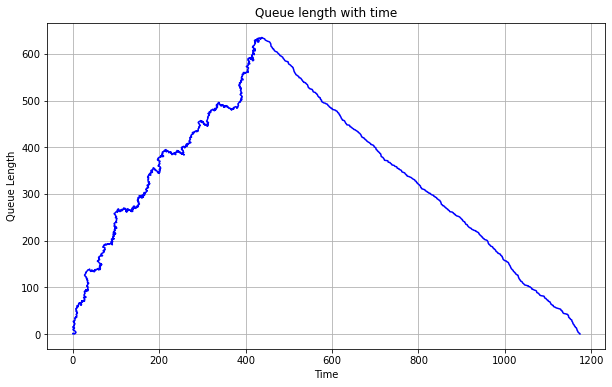

(635, 388.0977885646376)


In [7]:
queue = GG1Queue(1000, PDF.EXPONENTIAL, PDF.NORMAL, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_NORMAL_KWARGS)
queue.run_simulation()
queue.plot_queue_length()
print(queue.get_queue_stats())


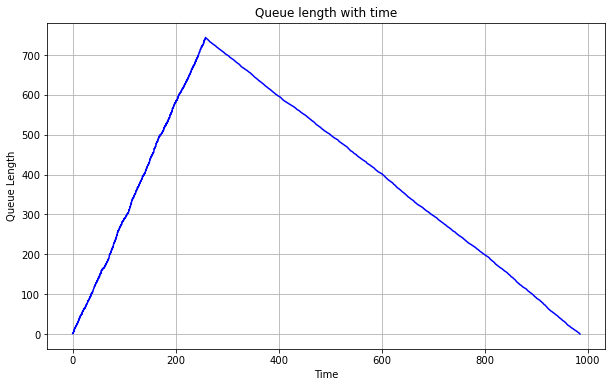

(744, 368.85174800481195)


In [8]:
queue = GG1Queue(1000, PDF.UNIFORM, PDF.UNIFORM, SERVICE_UNIFORM_KWARGS, ARRIVAL_UNIFORM_KWARGS)
queue.run_simulation()
queue.plot_queue_length()
print(queue.get_queue_stats())


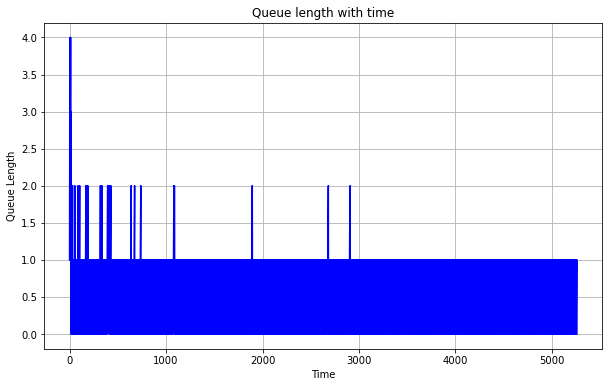

(4, 1.2596839561710957)


In [9]:
queue = GG1Queue(1000, PDF.EXPONENTIAL, PDF.HAWKES, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_HAWKES_KWARGS)
queue.run_simulation()
queue.plot_queue_length()
print(queue.get_queue_stats())


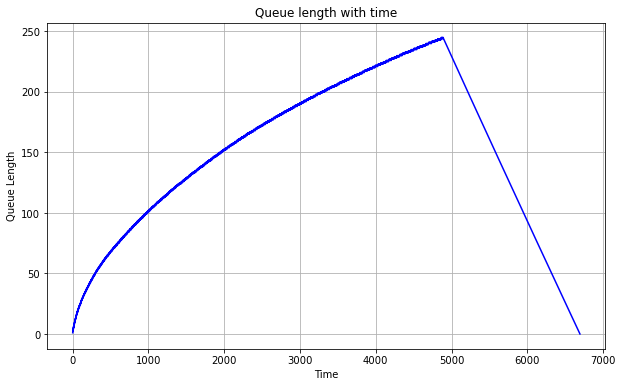

(245, 997.6595719239804)


In [10]:
queue = GG1Queue(1000, PDF.HAWKES, PDF.HAWKES, SERVICE_HAWKES_KWARGS, ARRIVAL_HAWKES_KWARGS)
queue.run_simulation()
queue.plot_queue_length()
print(queue.get_queue_stats())


In [16]:
wait_time = []
for _ in range(1000):
    queue = GG1Queue(1000, PDF.EXPONENTIAL, PDF.NORMAL, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_NORMAL_KWARGS)
    queue.run_simulation()
    _ , wt = queue.get_queue_stats()
    wait_time.append(wt)

plt.hist(wait_time)
plt.xlabel('wait_time')
plt.ylabel('Count')
plt.show()

KeyboardInterrupt: 

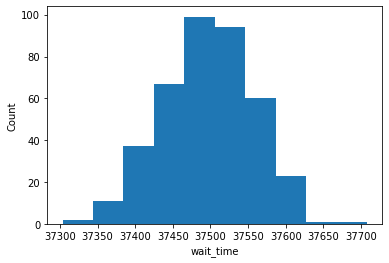

In [18]:
plt.hist(wait_time)
plt.xlabel('wait_time')
plt.ylabel('Count')
plt.show()

Run #1 took None seconds.
Run #100 took None seconds.
Run #200 took None seconds.
Run #300 took None seconds.
Run #400 took None seconds.
Run #500 took None seconds.
Run #600 took None seconds.
Run #700 took None seconds.
Run #800 took None seconds.
Run #900 took None seconds.
Run #1000 took None seconds.


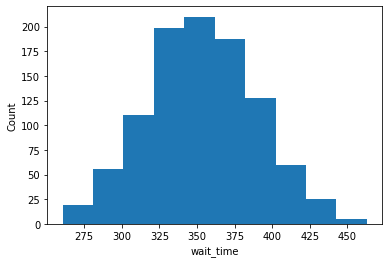

In [22]:
import time
from contextlib import contextmanager
import numpy as np

@contextmanager
def timer():
    start = time.perf_counter()
    yield
    end = time.perf_counter()
    

wait_time = []
run_time = []

for i in range(1000):
    with timer() as t:
        queue = GG1Queue(1000, PDF.EXPONENTIAL, PDF.NORMAL, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_NORMAL_KWARGS)
        queue.run_simulation()
        _ , wt = queue.get_queue_stats()
        wait_time.append(wt)
    run_time.append(t)
    if i == 0 or (i+1) % 100 == 0:
        print(f"Run #{i+1} took {t} seconds.")

plt.hist(wait_time)
plt.xlabel('wait_time')
plt.ylabel('Count')
plt.show()

In [23]:
import time
from contextlib import contextmanager

@contextmanager
def timer():
    start = time.perf_counter()
    yield
    end = time.perf_counter()
    print(f"Elapsed time: {end - start} seconds")

wait_time = []
run_time = []

for i in range(1000):
    with timer() as t:
        queue = GG1Queue(1000, PDF.HAWKES, PDF.NORMAL, SERVICE_HAWKES_KWARGS, ARRIVAL_NORMAL_KWARGS)
        queue.run_simulation()
        _ , wt = queue.get_queue_stats()
        wait_time.append(wt)
    run_time.append(t)
    if i == 0 or (i+1) % 100 == 0:
        print(f"Run #{i+1} took {t} seconds.")


Elapsed time: 1.2050890999998956 seconds
Run #1 took None seconds.
Elapsed time: 1.0958501999994041 seconds
Elapsed time: 1.094665200002055 seconds
Elapsed time: 1.1200064999975439 seconds
Elapsed time: 1.123093300000619 seconds
Elapsed time: 1.0997989999996207 seconds
Elapsed time: 1.1008787999999186 seconds
Elapsed time: 1.1373955999988539 seconds
Elapsed time: 1.1361413000013272 seconds
Elapsed time: 1.1122806000021228 seconds
Elapsed time: 1.09002259999761 seconds
Elapsed time: 1.0821381999994628 seconds
Elapsed time: 1.0611758999984886 seconds
Elapsed time: 1.089667100000952 seconds
Elapsed time: 1.1367055999980948 seconds
Elapsed time: 1.1145050000013725 seconds
Elapsed time: 1.1304725000009057 seconds
Elapsed time: 1.4565908000004129 seconds
Elapsed time: 1.1388236000020697 seconds
Elapsed time: 1.1166720000001078 seconds
Elapsed time: 1.124458300000697 seconds
Elapsed time: 1.1945129000014276 seconds
Elapsed time: 1.146341299998312 seconds
Elapsed time: 1.152243799999269 second

KeyboardInterrupt: 

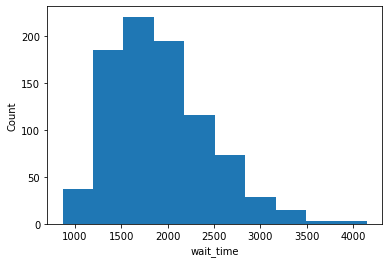

In [24]:
plt.hist(wait_time)
plt.xlabel('wait_time')
plt.ylabel('Count')
plt.show()